In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA

### 1.1 - 1.3

In [5]:
a = pd.DataFrame([[1, 2], [3, 4]])
b = np.linalg.inv(a)
a.dot(b)

,0,1
0,1.0,1.110223e-16
1,0.0,1.000000e+00


In [14]:
a = pd.DataFrame([[1, 1], [0, 1]])
b = np.linalg.inv(a)
a.dot(b)

,0,1
0,1.0,0.0
1,0.0,1.0


In [7]:
a = pd.DataFrame([[1, 2, 3], [0, 2, 3], [0, 0, 3]])
b = np.linalg.inv(a)
a.dot(b)

,0,1,2
0,1.0,0.0,-5.551115e-17
1,0.0,1.0,-5.551115e-17
2,0.0,0.0,1.000000e+00


### 1.4 - 1.6

In [18]:
a = pd.DataFrame([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
np.linalg.det(a)

0.0

In [17]:
np.linalg.eig(a)

(array([ 6.00000000e+00, -2.28386485e-16,  0.00000000e+00]),
 array([[-0.26726124, -0.04554875, -0.31352117],
        [-0.53452248,  0.72878003, -0.49613938],
        [-0.80178373, -0.68323128,  0.80966054]]))

### 1.7 - 1.8

In [22]:
b = pd.DataFrame([[2, 1, 1], [2, 3, 2], [3, 3, 4]])
np.linalg.eig(b)

(array([7., 1., 1.]), array([[ 0.26726124,  0.6933218 ,  0.3065219 ],
        [ 0.53452248, -0.72012932, -0.80864881],
        [ 0.80178373,  0.02680753,  0.50212691]]))

In [24]:
b_inv = np.linalg.inv(b)
b.dot(b_inv)

,0,1,2
0,1.000000e+00,5.551115e-17,-1.110223e-16
1,1.110223e-16,1.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,1.000000e+00


### 1.9 b_inv * b = identity. indentity - identity = the 0 matrix

### 1.10

In [25]:
b = pd.DataFrame([[1.1, 1, 1], [2, 2.1, 2], [3, 3, 3.1]])

In [26]:
np.linalg.eig(b)

(array([6.1, 0.1, 0.1]), array([[ 0.26726124, -0.16257345,  0.36636943],
        [ 0.53452248, -0.61166162, -0.81511041],
        [ 0.80178373,  0.77423507,  0.44874098]]))

In [28]:
b_inv = np.linalg.inv(b)
b.dot(b_inv)

,0,1,2
0,1.000000e+00,0.000000e+00,0.0
1,-1.776357e-15,1.000000e+00,0.0
2,-3.900705e-15,1.961273e-15,1.0


##### you get 0 matrix again

In [43]:
a = pd.DataFrame([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
i = pd.DataFrame([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
e = 0.1
ie = i * e
b = a + ie
b_inv = np.linalg.inv(b)
b_eig = np.linalg.eig(b)
print(b_inv)
print(b_inv @ b)
print(b_inv @ b - i)

[[ 8.36065574 -1.63934426 -1.63934426]
 [-3.27868852  6.72131148 -3.27868852]
 [-4.91803279 -4.91803279  5.08196721]]
              0             1             2
0  1.000000e+00 -2.220446e-16 -4.342610e-16
1  0.000000e+00  1.000000e+00 -6.464774e-16
2 -8.881784e-16  8.881784e-16  1.000000e+00
              0             1             2
0 -2.220446e-16 -2.220446e-16 -4.342610e-16
1  0.000000e+00  0.000000e+00 -6.464774e-16
2 -8.881784e-16  8.881784e-16 -1.554312e-15


In [64]:
a = pd.DataFrame([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
i = pd.DataFrame([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
e = 0.000000000000001
ie = i * e
b = a + ie
b_inv = np.linalg.inv(b)
b_eig = np.linalg.eig(b)
b_err = b_inv @ b - i
print(b_eig[0])
print(b_err)

[6.00000000e+00 1.22487665e-15 8.24717503e-16]
         0        1         2
0  0.21875  0.21875  0.208157
1  0.00000  0.00000 -0.105932
2  0.18750  0.18750  0.179025


### the max error values are:
    0.21875  0.21875  0.208157

    0.00000  0.00000 -0.105932

    0.18750  0.18750  0.179025

### EC

In [112]:
val = np.array([])
e = 0.1
size = 2
for i in range(1, 16):
    I = np.eye(size)
    ie = I * e
    a = np.ones(size)
    b = a + ie
    b_eig = np.linalg.eig(b)[0]
    b_inv = np.linalg.inv(b)
    b_err = b_inv @ b - I
    print(b_eig, b_err, "\n")
    e = e / 10
    val = np.append(val, LA.norm(b_eig, np.inf))

[2.1 0.1] [[ 8.8817842e-16  8.8817842e-16]
 [-8.8817842e-16 -8.8817842e-16]] 

[2.01 0.01] [[0. 0.]
 [0. 0.]] 

[2.001e+00 1.000e-03] [[0. 0.]
 [0. 0.]] 

[2.0001e+00 1.0000e-04] [[0. 0.]
 [0. 0.]] 

[2.00001e+00 1.00000e-05] [[0. 0.]
 [0. 0.]] 

[2.000001e+00 1.000000e-06] [[0. 0.]
 [0. 0.]] 

[2.0000001e+00 1.0000000e-07] [[-9.31322575e-10 -9.31322575e-10]
 [ 9.31322575e-10  9.31322575e-10]] 

[2.00000001e+00 9.99999994e-09] [[ 7.4505806e-09  7.4505806e-09]
 [-7.4505806e-09 -7.4505806e-09]] 

[2.00000000e+00 1.00000008e-09] [[0. 0.]
 [0. 0.]] 

[2.00000000e+00 1.00000008e-10] [[0. 0.]
 [0. 0.]] 

[2.00000000e+00 1.00000008e-11] [[0. 0.]
 [0. 0.]] 

[2.0000000e+00 1.0000889e-12] [[0. 0.]
 [0. 0.]] 

[2.00000000e+00 9.99200722e-14] [[0. 0.]
 [0. 0.]] 

[2.00000000e+00 9.99200722e-15] [[0. 0.]
 [0. 0.]] 

[2.00000000e+00 1.11022302e-15] [[0. 0.]
 [0. 0.]] 



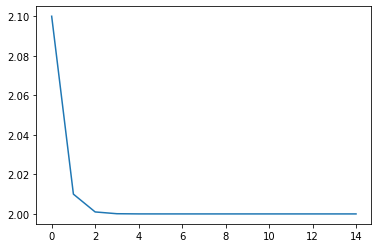

In [113]:
plt.plot(val)

##### Despite plugging in multiple matrix sizes, the eig values seem to plot out the same... maybe i am missing something? partial extra credit?